# **_Importing Libraries_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# **_Data PreProcessing_**

In [2]:
data = pd.read_csv(r'Data\cardata.csv')
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df = df.drop(columns=['Car_Name'])

In [7]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [10]:
Age_Car = 2024 - df.Year
df.insert(1, 'Age_Car', Age_Car)

In [11]:
df

,Year,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,10,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,11,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,13,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,10,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,8,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,9,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,15,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,7,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df1 = df.copy()
df1

,Year,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,10,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,11,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,13,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,10,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,8,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,9,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,15,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,7,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
df1 = df1.drop(columns=['Year'])

In [14]:
df1

,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,11,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,7,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,13,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,10,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,8,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,9,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,15,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,7,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [15]:
df1['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [16]:
df1['Fuel_Type'].replace(['Petrol', 'Diesel', 'CNG'],[2, 3, 4], inplace=True)
#### petrol = 2 , diesel = 3 , cng = 4

C:\Users\pouya\AppData\Local\Temp\ipykernel_2576\3384993885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Fuel_Type'].replace(['Petrol', 'Diesel', 'CNG'],[2, 3, 4], inplace=True)
C:\Users\pouya\AppData\Local\Temp\ipykernel_2576\3384993885.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [17]:
df1

,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000,2,Dealer,Manual,0
1,11,4.75,9.54,43000,3,Dealer,Manual,0
2,7,7.25,9.85,6900,2,Dealer,Manual,0
3,13,2.85,4.15,5200,2,Dealer,Manual,0
4,10,4.60,6.87,42450,3,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,8,9.50,11.60,33988,3,Dealer,Manual,0
297,9,4.00,5.90,60000,2,Dealer,Manual,0
298,15,3.35,11.00,87934,2,Dealer,Manual,0
299,7,11.50,12.50,9000,3,Dealer,Manual,0


In [18]:
df1['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [19]:
df1['Seller_Type'].replace(['Dealer', 'Individual'],[1, 2], inplace=True)
######## Dealer = 1 , Individual = 2

C:\Users\pouya\AppData\Local\Temp\ipykernel_2576\2057529824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Seller_Type'].replace(['Dealer', 'Individual'],[1, 2], inplace=True)
C:\Users\pouya\AppData\Local\Temp\ipykernel_2576\2057529824.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

In [20]:
df1

,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000,2,1,Manual,0
1,11,4.75,9.54,43000,3,1,Manual,0
2,7,7.25,9.85,6900,2,1,Manual,0
3,13,2.85,4.15,5200,2,1,Manual,0
4,10,4.60,6.87,42450,3,1,Manual,0
...,...,...,...,...,...,...,...,...
296,8,9.50,11.60,33988,3,1,Manual,0
297,9,4.00,5.90,60000,2,1,Manual,0
298,15,3.35,11.00,87934,2,1,Manual,0
299,7,11.50,12.50,9000,3,1,Manual,0


In [21]:
df1['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [22]:
df1['Transmission'].replace(['Manual', 'Automatic'],[0, 1], inplace=True)
########## manual = 0 , automatic = 1

C:\Users\pouya\AppData\Local\Temp\ipykernel_2576\1807567221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Transmission'].replace(['Manual', 'Automatic'],[0, 1], inplace=True)
C:\Users\pouya\AppData\Local\Temp\ipykernel_2576\1807567221.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

In [23]:
df1

,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000,2,1,0,0
1,11,4.75,9.54,43000,3,1,0,0
2,7,7.25,9.85,6900,2,1,0,0
3,13,2.85,4.15,5200,2,1,0,0
4,10,4.60,6.87,42450,3,1,0,0
...,...,...,...,...,...,...,...,...
296,8,9.50,11.60,33988,3,1,0,0
297,9,4.00,5.90,60000,2,1,0,0
298,15,3.35,11.00,87934,2,1,0,0
299,7,11.50,12.50,9000,3,1,0,0


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age_Car        301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


# **_Visualization_**

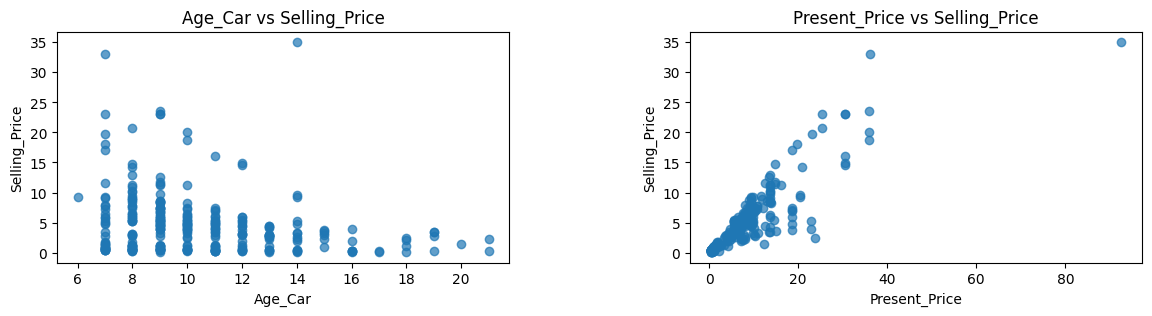

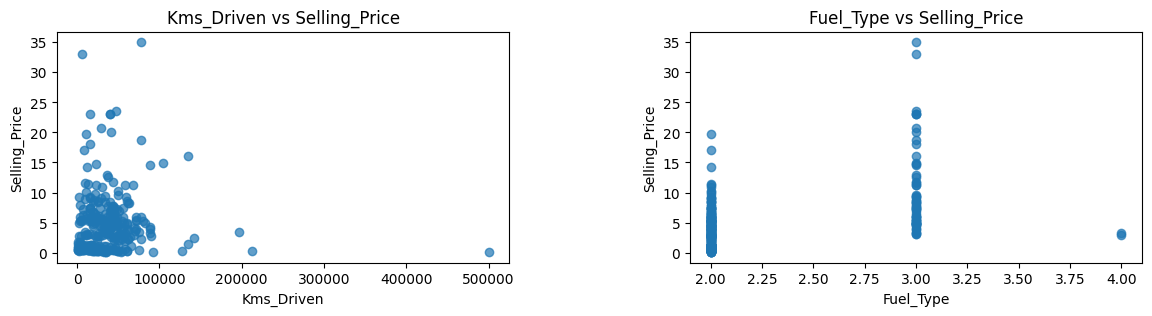

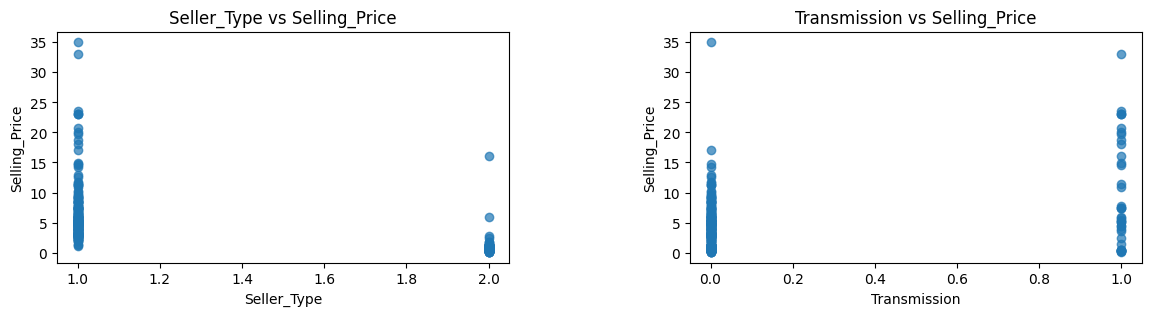

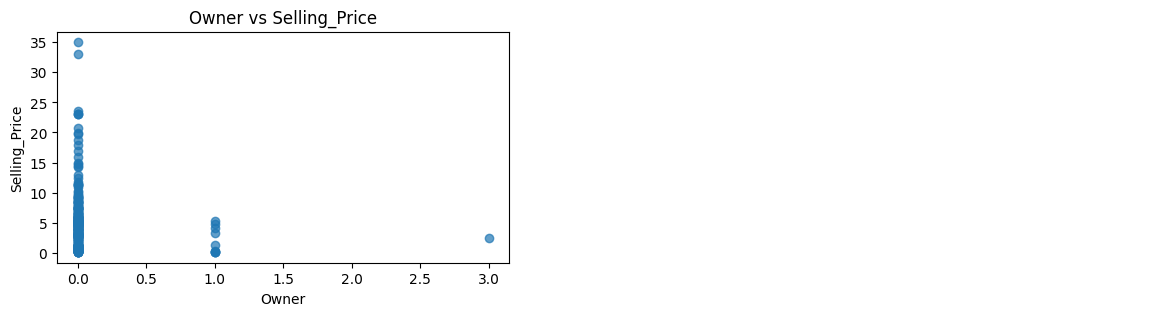

In [25]:
features = ['Age_Car','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']
for i in range(0, len(features), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 3))
    fig.subplots_adjust(wspace=0.4)  

    axes[0].scatter(df1[features[i]], df1['Selling_Price'], alpha=0.7)
    axes[0].set_xlabel(features[i])
    axes[0].set_ylabel('Selling_Price')
    axes[0].set_title(f'{features[i]} vs Selling_Price')

    if i + 1 < len(features):
        axes[1].scatter(df1[features[i + 1]], df1['Selling_Price'], alpha=0.7)
        axes[1].set_xlabel(features[i + 1])
        axes[1].set_ylabel('Selling_Price')
        axes[1].set_title(f'{features[i + 1]} vs Selling_Price')
    else:
        axes[1].axis('off') 

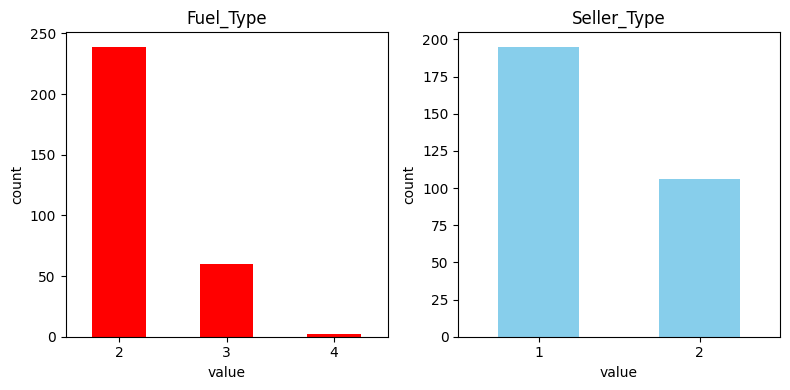

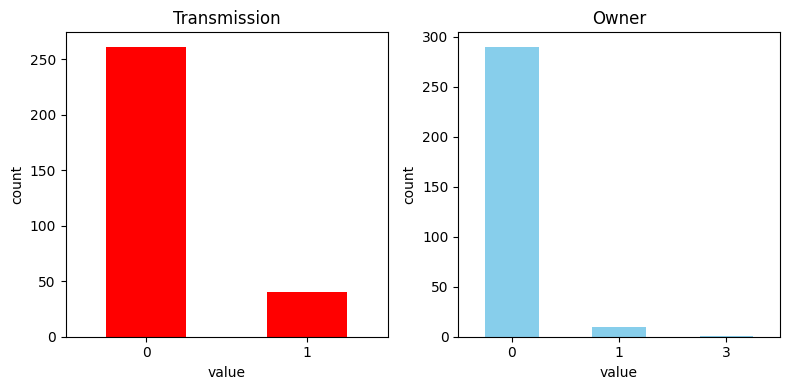

In [26]:
columns = ['Fuel_Type','Seller_Type','Transmission','Owner']
for i in range(0, len(columns), 2):
    plt.figure(figsize=(8,4))

    plt.subplot(1, 2, 1)
    df1[columns[i]].value_counts().plot(kind='bar' , color='red')
    plt.title(columns[i])
    plt.xlabel('value')
    plt.ylabel('count')
    plt.xticks(rotation=360)

    if i + 1 < len(columns):
        plt.subplot(1, 2, 2)
        df1[columns[i+1]].value_counts().plot(kind='bar' , color='skyblue')
        plt.title(columns[i+1])
        plt.xlabel('value')
        plt.ylabel('count')
        
    plt.xticks(rotation=360)
    plt.tight_layout()
    plt.show()

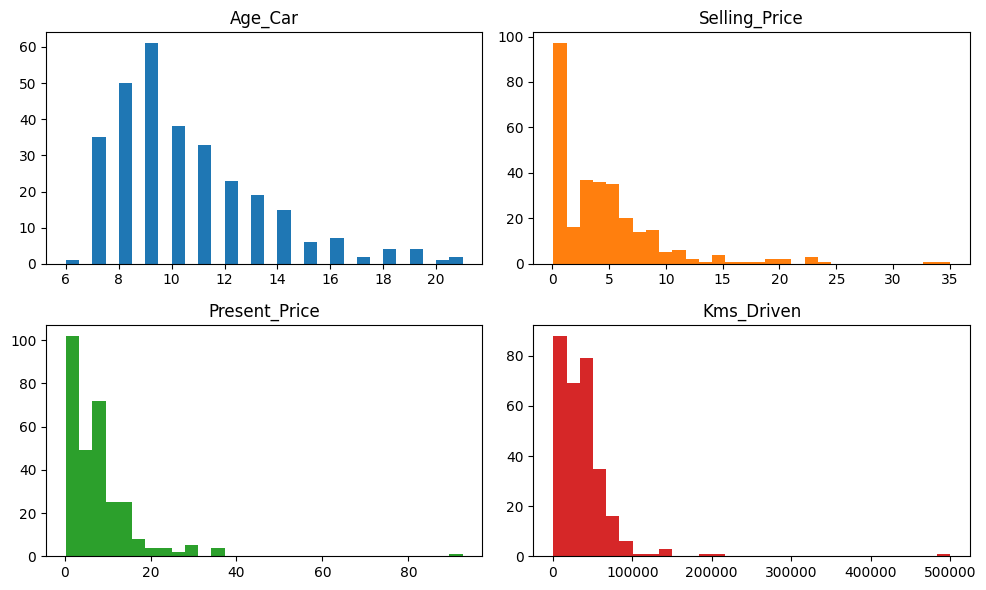

In [27]:
numeric_columns = ['Age_Car','Selling_Price','Present_Price','Kms_Driven']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.figure(figsize=(10,6))

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(df1[numeric_columns[i]], bins=30, color=colors[i])
    plt.title(numeric_columns[i])

plt.tight_layout()
plt.show()

In [28]:
df1.isna().sum()

Age_Car          0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# **_Training the Model_**

In [29]:
x = pd.DataFrame(df1, columns = ['Age_Car','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
y = df1.Selling_Price.values.reshape(-1,1)

In [30]:
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
results = []
for ts in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(y_test, y_pred)

    results.append({
    'Test size' : ts,
    'MAE' : round(mae,3),
    'MSE' : round(mse,3),
    'RMSE' : round(rmse,3),
    'R2 Score' : round(r2_score,3)})

df_result = pd.DataFrame(results)
df_result

,Test size,MAE,MSE,RMSE,R2 Score
0,0.10,1.138,2.783,1.668,0.874
1,0.15,1.118,2.553,1.598,0.890
2,0.20,1.000,2.189,1.479,0.913
3,0.25,1.188,4.412,2.100,0.862
4,0.30,1.217,4.417,2.102,0.852


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [32]:
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(Y_test, Y_pred)
print('Before improving MAE: ', mae)
print('Before improving MSE: ', mse)
print('Before improving RMSE: ', rmse)
print('Baseline R2 Score: ', r2_score)

Before improving MAE:  1.0000326012146679
Before improving MSE:  2.188556445657867
Before improving RMSE:  1.4793770464820206
Baseline R2 Score:  0.9134181721224436


# **_Improve model accuracy_**

In [33]:
df_coef = pd.DataFrame({
    'Feature' : x.columns,
    'Coefficient' : model.coef_.flatten()})
df_coef

,Feature,Coefficient
0,Age_Car,-0.392595
1,Present_Price,0.436620
2,Kms_Driven,-0.000005
3,Fuel_Type,1.443773
4,Seller_Type,-1.120770
5,Transmission,1.438305
6,Owner,-0.989223


In [34]:
df2 = df1.copy()
df2

,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000,2,1,0,0
1,11,4.75,9.54,43000,3,1,0,0
2,7,7.25,9.85,6900,2,1,0,0
3,13,2.85,4.15,5200,2,1,0,0
4,10,4.60,6.87,42450,3,1,0,0
...,...,...,...,...,...,...,...,...
296,8,9.50,11.60,33988,3,1,0,0
297,9,4.00,5.90,60000,2,1,0,0
298,15,3.35,11.00,87934,2,1,0,0
299,7,11.50,12.50,9000,3,1,0,0


In [35]:
condition = df2[df2["Selling_Price"] > 28]
condition

,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,7,33.0,36.23,6000,3,1,1,0
86,14,35.0,92.60,78000,3,1,0,0


In [36]:
df2.drop(condition.index, inplace=True)

In [37]:
df2

,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000,2,1,0,0
1,11,4.75,9.54,43000,3,1,0,0
2,7,7.25,9.85,6900,2,1,0,0
3,13,2.85,4.15,5200,2,1,0,0
4,10,4.60,6.87,42450,3,1,0,0
...,...,...,...,...,...,...,...,...
296,8,9.50,11.60,33988,3,1,0,0
297,9,4.00,5.90,60000,2,1,0,0
298,15,3.35,11.00,87934,2,1,0,0
299,7,11.50,12.50,9000,3,1,0,0


In [38]:
condition2 = df2[df2["Kms_Driven"] > 400000]
condition2

,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,16,0.17,0.52,500000,2,2,1,0


In [39]:
df2.drop(condition2.index, inplace=True)

In [40]:
df2

,Age_Car,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000,2,1,0,0
1,11,4.75,9.54,43000,3,1,0,0
2,7,7.25,9.85,6900,2,1,0,0
3,13,2.85,4.15,5200,2,1,0,0
4,10,4.60,6.87,42450,3,1,0,0
...,...,...,...,...,...,...,...,...
296,8,9.50,11.60,33988,3,1,0,0
297,9,4.00,5.90,60000,2,1,0,0
298,15,3.35,11.00,87934,2,1,0,0
299,7,11.50,12.50,9000,3,1,0,0


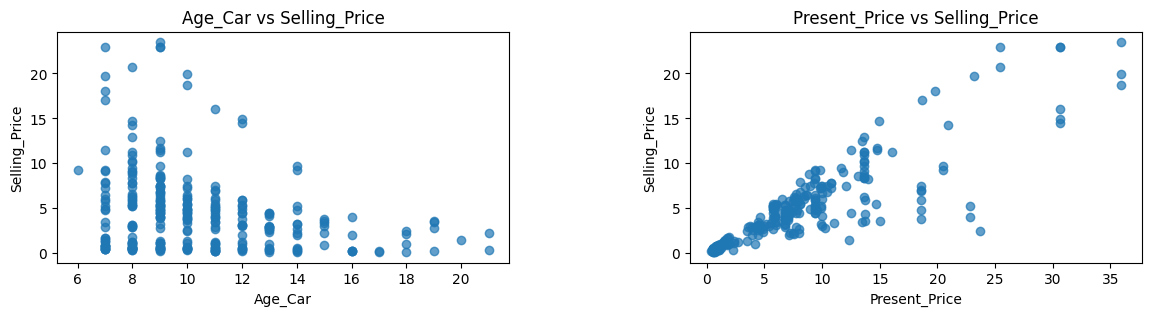

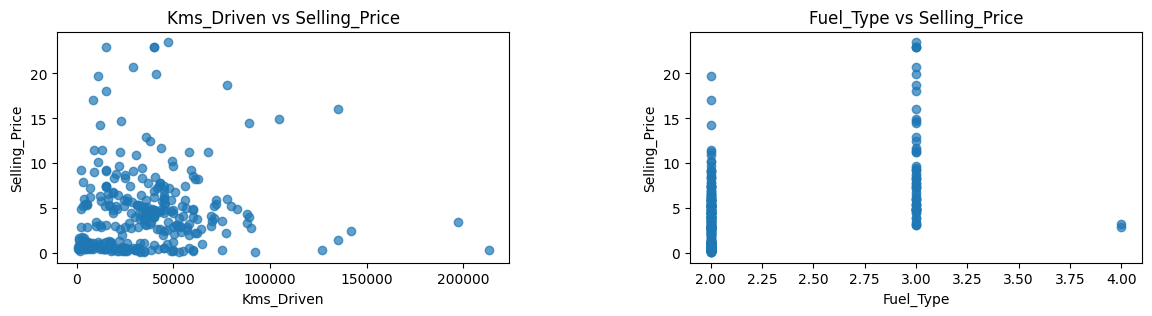

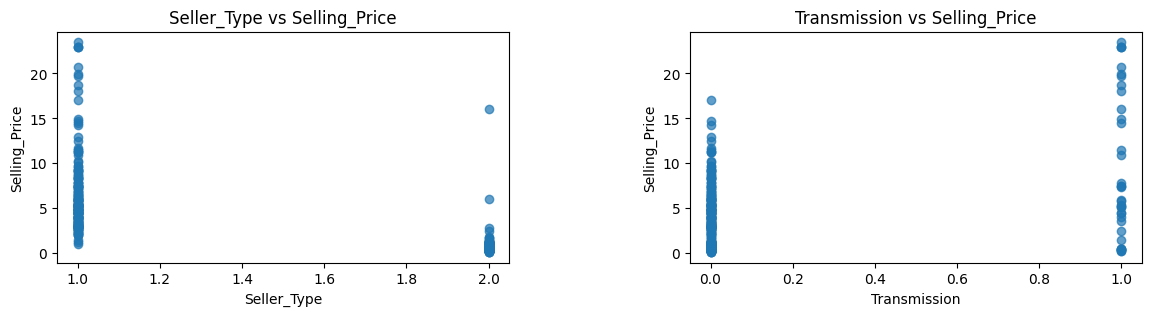

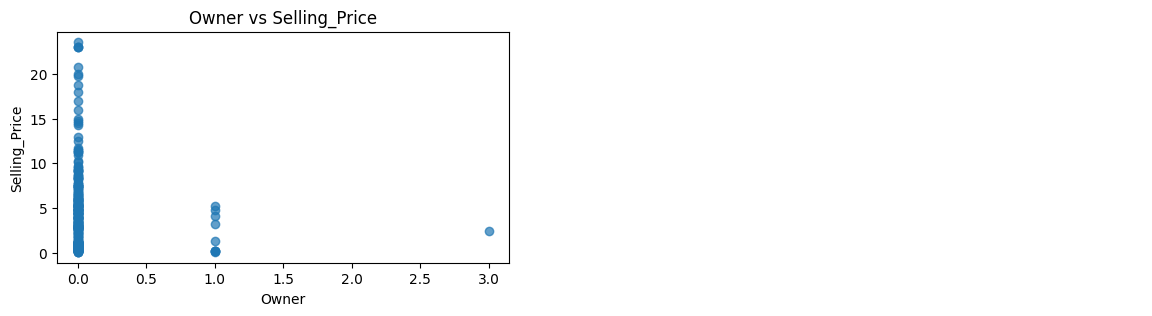

In [41]:
features = ['Age_Car','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']
for i in range(0, len(features), 2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 3))
    fig.subplots_adjust(wspace=0.4)  

    axes[0].scatter(df2[features[i]], df2['Selling_Price'], alpha=0.7)
    axes[0].set_xlabel(features[i])
    axes[0].set_ylabel('Selling_Price')
    axes[0].set_title(f'{features[i]} vs Selling_Price')

    if i + 1 < len(features):
        axes[1].scatter(df2[features[i + 1]], df2['Selling_Price'], alpha=0.7)
        axes[1].set_xlabel(features[i + 1])
        axes[1].set_ylabel('Selling_Price')
        axes[1].set_title(f'{features[i + 1]} vs Selling_Price')
    else:
        axes[1].axis('off')  

In [42]:
X = pd.DataFrame(df2, columns = ['Age_Car','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
Y = df2.Selling_Price.values.reshape(-1,1)

In [43]:
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
results = []
df_result = pd.DataFrame(results)
df_result

""


In [44]:
for ts in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ts, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(y_test, y_pred)

    results.append({
    'Test size' : ts,
    'MAE' : round(mae,3),
    'MSE' : round(mse,3),
    'RMSE' : round(rmse,3),
    'R2 Score' : round(r2_score,3)})

In [45]:
df_result = pd.DataFrame(results)
df_result

,Test size,MAE,MSE,RMSE,R2 Score
0,0.10,0.904,1.526,1.235,0.943
1,0.15,0.910,1.525,1.235,0.929
2,0.20,0.944,1.553,1.246,0.932
3,0.25,1.095,2.710,1.646,0.891
4,0.30,1.022,2.366,1.538,0.891


In [46]:
X = pd.DataFrame(df2, columns = ['Age_Car','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
y = df2.Selling_Price.values.reshape(-1,1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
r2 = round(metrics.r2_score(y_test, y_pred),3)
r2

0.943

In [49]:
results = []
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_pred)

results.append({
'Test_Size' : 0.1,
'MAE' : round(mae,3),
'MSE' : round(mse,3),
'RMSE' : round(rmse,3),
'R2 Score' : round(r2_score,3)})

df_result2 = pd.DataFrame(results)
df_result2 

,Test_Size,MAE,MSE,RMSE,R2 Score
0,0.1,0.904,1.526,1.235,0.943


In [50]:
df_coef = pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : model.coef_.flatten()})
df_coef

,Feature,Coefficient
0,Age_Car,-0.881278
1,Present_Price,3.603283
2,Kms_Driven,-0.597948
3,Fuel_Type,0.532953
4,Seller_Type,-0.361651
5,Transmission,0.116738
6,Owner,-0.198798


In [51]:
X = pd.DataFrame(df2, columns = ['Age_Car','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'])
y = df2.Selling_Price.values.reshape(-1,1)

In [52]:
from sklearn.model_selection import KFold

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
model = LinearRegression()
r2_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score = round(metrics.r2_score(y_test, y_pred),3)
    r2_scores.append(score)

In [54]:
avg_r2 = round(np.mean(r2_scores),3)
print("R2 Score in each fold: ", r2_scores)
print("average R2 Scores: ", avg_r2)

R2 Score in each fold:  [0.932, 0.812, 0.888, 0.861, 0.822]
average R2 Scores:  0.863
